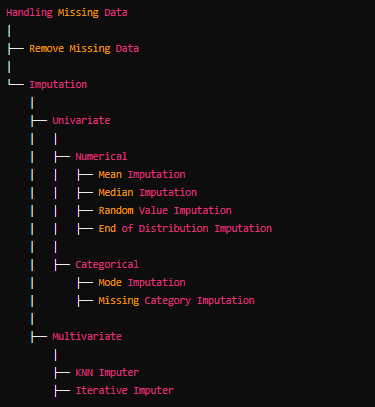

# Remove Rows/columns with too many missing values

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('Titanic-Dataset.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
print("Before removing missing values:\n",df.isnull().sum())

Before removing missing values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [9]:
#Remove Rows with Missing Values--
#This will remove all rows where at least one column has a missing value.
df_cleanRows = df.dropna()
print("Before removing rows:\n",df.shape)
print("After removing rows:\n",df_cleanRows.shape)
print("Remaining Missing vaues:\n",df_cleanRows.isnull().sum())

Before removing rows:
 (891, 12)
After removing rows:
 (183, 12)
Remaining Missing vaues:
 PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [13]:
#Since Cabin has 687 missing values, a lot of rows will be removed.
#This may reduce our dataset too much, so we usually avoid this unless missing values are few.
#It might be better to remove the entire column instead.
df_cleanCols = df.drop(columns = ['Cabin'])
print("Before removing columns:\n",df.shape)
print("After removing columns:\n",df_cleanCols.shape)
print("Remaining Missing vaues:\n",df_cleanCols.isnull().sum())

Before removing columns:
 (891, 12)
After removing columns:
 (891, 11)
Remaining Missing vaues:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64


# Imputation

*   Univariate
*   Multivariate



# Univariate

---


*   Numerical - Meand and Median, Random, End of distribution
*   Categorical - Mode, Missing Category imputation




In [18]:
#Mean Imputation
df_mean = df.copy()
df_mean['Age'] = df_mean['Age'].fillna(df_mean['Age'].mean())
print("Missing values in Age:",df['Age'].isnull().sum())
print("After imputing mean in missing values:",df_mean['Age'].isnull().sum())

Missing values in Age: 177
After imputing mean in missing values: 0


In [23]:
#Median Imputation
df_median = df.copy()
df_median['Age'] = df_median['Age'].fillna(df_median['Age'].median())
print("Missing values present in Cabin:", df['Age'].isnull().sum())
print("After imputing Median in missing values:", df_median['Age'].isnull().sum())

Missing values present in Cabin: 177
After imputing Median in missing values: 0


In [28]:
#Random Value
#Filling missing value with Random Numbers -
df.loc[df['Age'].isnull(), 'Age'] = np.random.randint(10, 80, size=df['Age'].isnull().sum())
print("Missing values in Age:", df['Age'].isnull().sum())
#Fill missing values in the Embarked column with randomly chosen existing values from the same column -
df['Embarked'] = df['Embarked'].fillna(np.random.choice(df['Embarked'].dropna().values))
print("Missing values in Embarked:", df['Embarked'].isnull().sum())
#Assign a Fixed Random Placeholder (Like 999) -
df['Cabin'] =  df['Cabin'].fillna('999')
print("Missing values in Cabin:", df['Cabin'].isnull().sum())

Missing values in Age: 0
Missing values in Embarked: 0
Missing values in Cabin: 0


In [29]:
#End Of Distribution
print(df['Age'].describe())

count    891.000000
mean      33.076510
std       17.414124
min        0.420000
25%       21.000000
50%       30.000000
75%       44.000000
max       80.000000
Name: Age, dtype: float64


In [37]:
extreme_value = df['Age'].mean() + 3 * df['Age'].std()
df['Age'].fillna(extreme_value)
print("After EoD:",df['Age'].isnull().sum())

After EoD: 0


In [34]:
#Mode Imputation
df_mode = df.copy()
df_mode['Embarked'] = df_mode['Embarked'].fillna(df_mode['Embarked'].mode()[0])
print("After Mode Imputation:", df_mode['Embarked'].isnull().sum())

After Mode Imputation: 0


In [35]:
#Missing category Imputation
df_missing_cat = df.copy()
df_missing_cat['Embarked'] = df_missing_cat['Embarked'].fillna('Missing')
print("After Missing Category Imputation:",df_missing_cat['Embarked'].isnull().sum())

After Missing Category Imputation: 0


# Multivariate

---



*   KNN Imputer
*   Iterative Imputer



In [42]:
df2 = pd.read_csv('AmesHousing.csv')
print("Missing values in this dataset\n:",df2.isnull().sum())

Missing values in this dataset
: Order               0
PID                 0
MS SubClass         0
MS Zoning           0
Lot Frontage      490
                 ... 
Mo Sold             0
Yr Sold             0
Sale Type           0
Sale Condition      0
SalePrice           0
Length: 82, dtype: int64


In [43]:
df2.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [49]:
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

Finds k-nearest neighbors: For each missing value, the algorithm finds the k closest rows (neighbors) based on non-missing values.

Averages their values: It calculates the mean (or median) of those k neighbors and imputes the missing value.

Steps Involved -

Identifies missing values in the dataset.

Finds k nearest rows using Euclidean distance (or another distance metric).

Uses neighbors' values to fill in missing values using their mean/median.
Repeats for all missing values.

In [59]:
from sklearn.impute import KNNImputer
# Ensure column names are clean
df2.columns = df2.columns.str.strip()
# Select numerical columns only
numeric_cols = df2.select_dtypes(include=['number']).columns
# Apply the missing value filter only on numeric columns
num_cols_with_missing = numeric_cols[df2[numeric_cols].isnull().sum() > 0]
# Check if columns exist in df
missing_cols_not_found = [col for col in num_cols_with_missing if col not in df2.columns]
if missing_cols_not_found:
    print("These columns were not found in df:", missing_cols_not_found)
else:
    # Apply KNN Imputer
    knn_imputer = KNNImputer(n_neighbors=5)
    df_knn_imputed = df2.copy()
    df_knn_imputed[num_cols_with_missing] = knn_imputer.fit_transform(df2[num_cols_with_missing])
    print(" KNN Imputation Done!")


 KNN Imputation Done!


Uses a predictive modeling approach to estimate missing values.

Each missing value is treated as a dependent variable and predicted using other available features.

Steps Involved -

Identifies missing values in the dataset.

Selects one column at a time where values are missing.

Uses other columns as features to predict the missing values.

Fills in missing values using a machine learning model (default: BayesianRidge regression).

Repeats for multiple iterations to refine predictions.

In [60]:
import pandas as pd
from sklearn.impute import IterativeImputer
# Ensure column names are clean
df2.columns = df2.columns.str.strip()
# Select numerical columns only
numeric_cols = df2.select_dtypes(include=['number']).columns
# Identify numeric columns with missing values
num_cols_with_missing = numeric_cols[df2[numeric_cols].isnull().sum() > 0]
# Check if columns exist in df
missing_cols_not_found = [col for col in num_cols_with_missing if col not in df2.columns]
if missing_cols_not_found:
    print("These columns were not found in df:", missing_cols_not_found)
else:
    # Apply Iterative Imputer
    iterative_imputer = IterativeImputer(max_iter=10, random_state=42)
    df_iterative_imputed = df2.copy()
    # Fit and transform the missing values
    df_iterative_imputed[num_cols_with_missing] = iterative_imputer.fit_transform(df2[num_cols_with_missing])
    print("Iterative Imputation Done!")

Iterative Imputation Done!
